In [8]:
!pip install openai requests pillow IPython

Image 1:


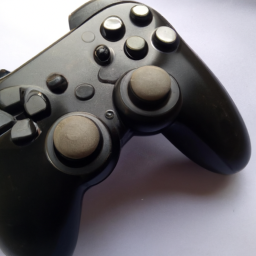

Image 2:


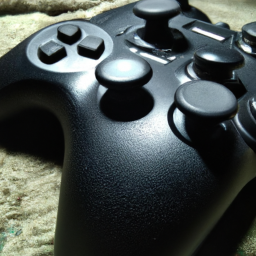

Image 3:


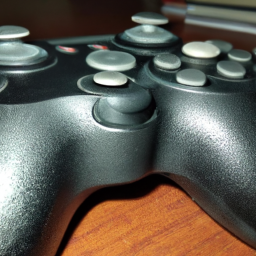

In [3]:
from openai import OpenAI
from io import BytesIO
import base64
from PIL import Image
from IPython.display import display


client = OpenAI()

input_text = input("Digite o texto para gerar a imagem: ")

# Generate image based on input text
response = client.images.generate(
    model="dall-e-2",
    prompt=input_text,
    n=3,
    quality="standard",
    size="256x256",
    response_format="b64_json"
)

images = []
for i in range(3):
    print(f"Imagem {i+1}:")
    image = Image.open(BytesIO(base64.b64decode(response.data[i].b64_json)))
    image = image.convert("RGBA")
    image_buffer = BytesIO()
    image.save(image_buffer, format="PNG")
    images.append(image_buffer)
    display(image)


Original Image:


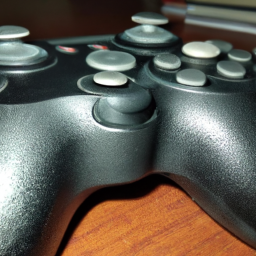

Edited Image:


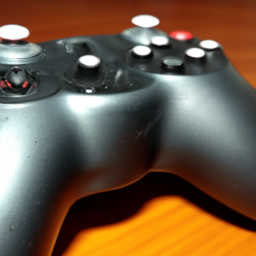

In [6]:
index_image = int(input("Digite o índice da imagem que deseja editar (1, 2 ou 3):"))


if images[index_image-1] is None:
  print("index invalido")
  exit()

image = images[index_image-1]

response_edit = client.images.create_variation(
  model="dall-e-2",
  image= image,
  n=1,
  size="256x256",
  response_format="b64_json"
)

image_b64_edit = response_edit.data[0].b64_json
image_edit = Image.open(BytesIO(base64.b64decode(image_b64_edit)))

print("Imagem Original")
display(Image.open(image))

print("Imagem Editada:")
display(image_edit)


